In [3]:
# Imports
import sys
import os
import numpy as np
import pandas as pd
import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from numpy import argmax
import seaborn as sns

from imp import reload
import utils
reload(utils)
from utils import*

import matplotlib.pyplot as plt
%matplotlib inline

from pathlib import Path

In [10]:
working_dir = Path.cwd()
data_dir = working_dir / 'User_data'

csv_file_path = data_dir/'12345/session_1/12345_session_1_22-03-2023_21-53.csv'
print(csv_file_path)

/home/mt1/21CS60R01/OpenBCI_DataAnlaysis/User_data/12345/session_1/12345_session_1_22-03-2023_21-53.csv


In [45]:
#read the csv file into a pandas dataframe
df = pd.read_csv(csv_file_path)

#get the starting 10 columns corresponding to the 8 channels and the index data
df1 = df.iloc[:,0:10]

#also keep the last timestamp column
df1['Timestamp'] = df[' Timestamp (Formatted)']

#reindex the columns
df1 = df1.reindex(columns=[' EXG Channel 0', ' EXG Channel 1', ' EXG Channel 2', ' EXG Channel 3', ' EXG Channel 4', 
                           ' EXG Channel 5', ' EXG Channel 6', ' EXG Channel 7', 'Changed Sample Index','Sample Index' ,'Timestamp'])


#drop the sample index column
df1 = df1.drop(['Sample Index'], axis=1)

#rename the channels
df1 = df1.rename(columns={' EXG Channel 0': 1, ' EXG Channel 1': 2, ' EXG Channel 2': 3,
                            ' EXG Channel 3': 4, ' EXG Channel 4': 5, ' EXG Channel 5': 6,
                            ' EXG Channel 6': 7, ' EXG Channel 7': 8,'Changed Sample Index':'Index'})

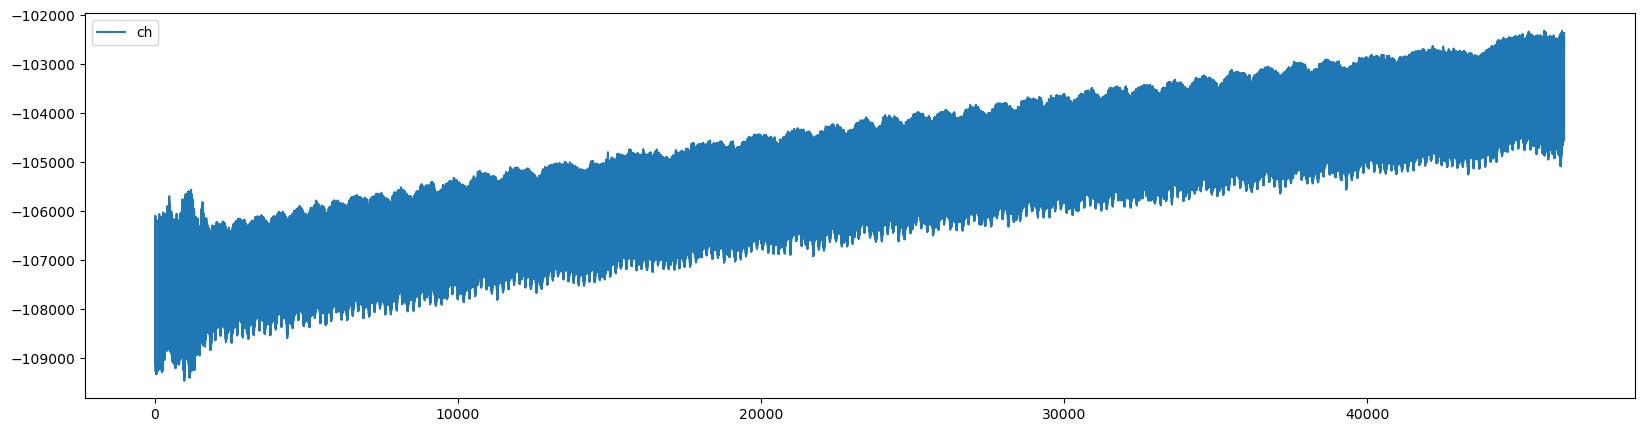

In [50]:

d_plot(df1,chan=[1])